<h1>Task 7: Support Vector Machines (SVM)</h1>

<h2>Objective: Use SVMs for linear and non-linear classification.<br>
Tools: Tools: Scikit-learn, NumPy, Matplotlib</h2>


<h3>Task to be performed:</h3>
<ol>
<li>Load and prepare a dataset for binary classification.
<li>Train an SVM with linear and RBF kernel.
<li>Visualize decision boundary using 2D data.
<li>Tune hyperparameters like C and gamma.
<li>Use cross-validation to evaluate performance.
</ol>

<h3>Dataset:- Breast Cancer Dataset downloaded from Kaggle </h3>

In [1]:
#Import required libabries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

<h5>T-1:- Load and prepare a dataset for binary classification.</h5>

In [2]:
df = pd.read_csv("breast-cancer.csv")

In [3]:
# Print info and first few rows
print("Columns:", df.columns)
print(df.head())

Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M    

In [5]:
# Encode target if it's not numeric
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

In [6]:
# Separate features and target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Use only first 2 features for visualization
X_vis = X_scaled[:, :2]

<h5>T-2:- Train an SVM with linear and RBF kernel.</h5>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

SVC(C=1)

<h5>T-3:- Visualize decision boundary using 2D data.</h5>

In [10]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ['red', 'green']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(X[y == cls, 0], X[y == cls, 1], label=f"Class {cls}",
                    edgecolor='k', c=cmap_bold[idx])
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

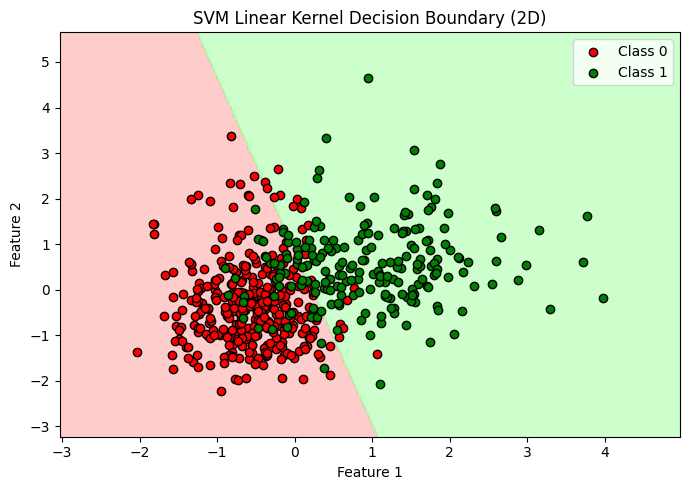

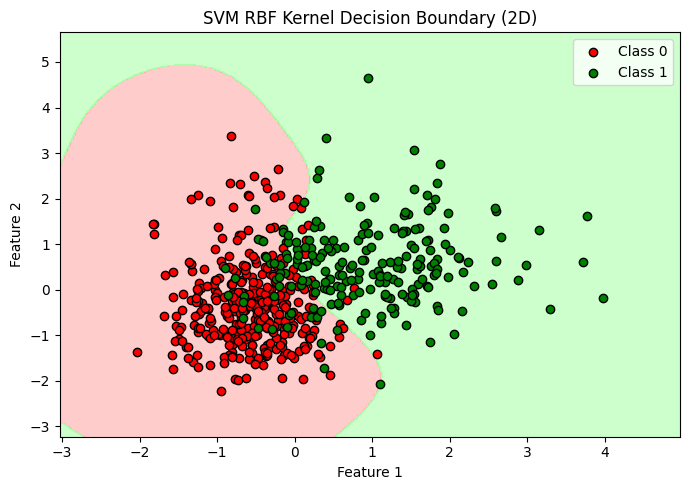

In [11]:
# Visualize using only 2 features
svm_vis_linear = SVC(kernel='linear', C=1)
svm_vis_linear.fit(X_vis, y)
plot_decision_boundary(svm_vis_linear, X_vis, y, "SVM Linear Kernel Decision Boundary (2D)")

svm_vis_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis_rbf.fit(X_vis, y)
plot_decision_boundary(svm_vis_rbf, X_vis, y, "SVM RBF Kernel Decision Boundary (2D)")


<h5>T-4:- Tune hyperparameters like C and gamma.</h5>

In [12]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_scaled, y)

print("\nBest Parameters (RBF):", grid.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(grid.best_score_))



Best Parameters (RBF): {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.98


<h5>T-5:- Use cross-validation to evaluate performance.</h5>

In [13]:
final_model = grid.best_estimator_

cv_scores = cross_val_score(final_model, X_scaled, y, cv=5)
print("\nFinal Cross-Validation Accuracy:", np.mean(cv_scores).round(3))



Final Cross-Validation Accuracy: 0.979


In [14]:
# Final test set performance
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

